### Probability and statistics

In [154]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial


### Example - coin tossing

In [155]:
# preparing samples - by simple python code
number_of_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(number_of_tosses)])
tails = number_of_tosses - heads
print(f"heads, tails: {[heads, tails]}")

heads, tails: [52, 48]


In [165]:
# preparing smaples - by Multinominal object
fair_probability = torch.tensor([0.5, 0.5]) # index[0] - heads, index[1] - tails; we are setting a probability of results of coin tossing
Multinomial(100, fair_probability).sample() # calculate ocurance for 100 samples

tensor([54., 46.])

In [157]:
Multinomial(100, fair_probability).sample() / 100 # dividing by the number of tosses gives us the frequency of each outcome in our data

tensor([0.5300, 0.4700])

In [158]:
# the bigger the number of samples, the more accurate the results are (in case of coin tossing, more thowards our initial probability)
Multinomial(10000, fair_probability).sample() / 10000 # dividing by the number of tosses gives us the frequency of each outcome in our data


tensor([0.5055, 0.4945])

(tensor([[0.0000e+00, 1.0000e+00],
         [1.0000e+00, 1.0000e+00],
         [2.0000e+00, 1.0000e+00],
         ...,
         [5.0110e+03, 4.9870e+03],
         [5.0120e+03, 4.9870e+03],
         [5.0130e+03, 4.9870e+03]]),
 array([[0.        , 1.        ],
        [0.5       , 0.5       ],
        [0.6666667 , 0.33333334],
        ...,
        [0.50120026, 0.49879977],
        [0.50125015, 0.49874988],
        [0.5013    , 0.4987    ]], dtype=float32))

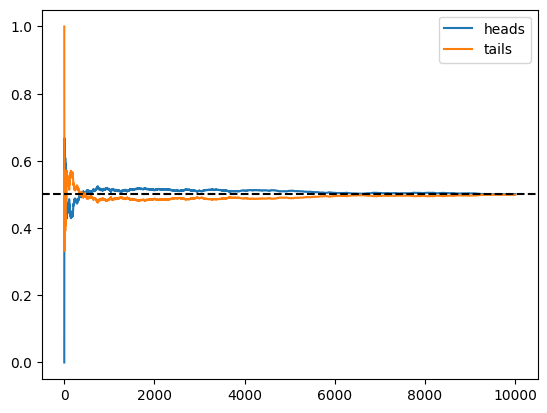

In [163]:
counts = Multinomial(1, fair_probability).sample((10000,))
cum_sum = counts.cumsum(dim=0)
estimates = cum_sum / cum_sum.sum(dim=1, keepdim=True)
estimates = estimates.numpy()

from matplotlib import pyplot

graph = pyplot.gca()
graph.plot(estimates)
graph.legend(["heads", "tails"])
graph.axhline(y=0.5, color="black", linestyle="dashed")
cum_sum, estimates